# Supervised Machine Learning Model Interpretation

This training module was developed by Alexis Payton, MS, Lauren Koval, and Dr. Julia E. Rager

Fall 2023

## Introduction to Supervised Machine Learning Model Interpretation
Supervised machine learning can utilize a multitude of predictors unlike traditional statistical analyses, which allows these models to more closely resemble real-world, complex environmental health scenarios offering new insights. However, one disadvantage of machine learning is that it is often not as easily interpretable as traditional statistics (ie. linear regression). That being said, there are methods and concepts that can be applied to supervised machine learning algorithms to aid in the understanding of its predictions including:

+ Variable (Feature) Importance
+ Decision Boundaries
  
Visualization of these methods is an important part of interpretability, since visualizing helps convey concepts faster.

<br>

## Variable Importance

When a supervised machine learning (ML) algorithm makes predictions, it relies more heavily on some variables than others. How much a variable contributes to classifying data is known as **variable (feature) importance**. There are many methods that are used to measure feature importance, however in this module we'll be highlighting mean decrease gini that can easily be extracted from random forest (RF) classification-based models. Mean decrease gini (gini impurity) simply quantifies the improvement of predictivity with the addition of each predictor in a decision tree, which is then averaged over all the decision trees tested. The higher the value the greater the importance on the algorithm. 

Note for RF regression-based models, node purity can be extracted as a measure of feature importance. For more information, check on the following resources regarding [Feature Importance](https://www.baeldung.com/cs/ml-feature-importance) and [Mean Decrease Gini](https://cran.r-project.org/web/packages/rfVarImpOOB/vignettes/rfVarImpOOB-vignette.html).

<br>

## Decision Boundary 
Another concept that is pertinent to a model's interpretability, is understanding a decision boundary and how visualizing it can further aid in understanding how the model classifies new data points. A **decision boundary** is a line (or a hyperplane) that seeks to separate the training data by class. This line can be linear or non-linear and is formed in n-dimensional space. To clarify, although support vector machine (SVM) specifically uses decision boundaries to classify training data and make predictions on test data, decision boundaries can still be drawn for other algorithms.  

A decision boundary can be visualized to convey to the reader in a more succinct manner how well an algorithm is able to classify an outcome based on the data given. It is important to note that most ML models make use of datasets that contain 3 or more predictors and it is difficult to visualize a plot in more than three dimensions. Therefore, the number of features and which features to plot need to be narrowed down to two variables. For this reason, the resulting visualization is not a true representation of the decision boundary from the initial model, since the visualization only relies on prediction results from two predictors. Nevertheless, decision boundary plots can be powerful figures. 

When choosing variables for decision boundary plots, features that have the most influence on the model are often selected, but that is not always the case. Sometimes predictors are selected based upon the environmental health implications relevant to the research question. For example in [Perryman et. al](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0285721), lung response resulting from ozone exposure was investigated by sampling derivatives of cholesterol biosynthesis in human subjects. In this paper, these sterol metabolites were used to predict whether a subject would be classified as having a lung response that was considered to be non-responsive or responsive. A decision boundary plot was made using two predictors:

+ Cholesterol, given that it had the highest variable importance and
+ Vitamin D, given its synthesis can be affected by ozone despite it having a lower variable importance in the paper's models.

<img src="https://github.com/UNC-CEMALB/P1006_Data-Organization-for-High-Dimensional-Analyses-in-Environmental-Health/assets/69641855/c69e7341-97bc-4d1b-a718-7a0f979c9830" width="684" />

From this decision boundary plot, we can takeaway that...
+ Subjects with more lung inflammation ("responders") after ozone exposure tended to have higher Vitamin D levels and lower Cholesterol levels.
+ These "responder" subjects were more likely to be non-asthmatics. 

<br>

## Introduction to Training Module
In the previous module, we investigated whether a classification-based RF model using well water variables would be accurate predictors of iAs detection. In this module, we will extract variable importance from the same algorithm and plot variable importance. The two features with the highest variable importance will be identified and used to construct a decision boundary plot to determine how features are associated with iAs detection. 

The data to be used in this module was described and referenced previously in [TAME Toolkit module 5](insert link here). 

## Training Module's Environmental Health Questions

This training module was specifically developed to answer the following environmental health questions:

1. After plotting variable importance from highest to lowest, which two predictors have the highest variable importance on the predictive accuracy of iAs detection from a RF algorithm?
   
2. Using the two features with the highest variable importance, how can a decision boundary be visualized to separate and predict iAs detection?

## Script Preparations
### Cleaning the global environment

In [ ]:
rm(list=ls())

### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [ ]:
if (!requireNamespace("readxl"))
  install.packages("readxl");
if (!requireNamespace("lubridate"))
  install.packages("lubridate");
if (!requireNamespace("tidyverse"))
  install.packages("tidyverse");
if (!requireNamespace("caret"))
  install.packages("caret");
if (!requireNamespace("randomForest"))
  install.packages("randomForest");

### Loading R packages required for this session

In [1]:
library(readxl);
library(lubridate);
library(tidyverse);
library(caret);
library(randomForest);


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr   1.1.3     ✔ readr   2.1.4
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ ggplot2 3.4.3     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

### Importing example dataset
**Will need to change input to module number and add module number to the file itself**

In [2]:
# Load the data
arsenic_data <- data.frame(read_excel("Module5/Module5_Arsenic_Data.xlsx"))

# View the top of the dataset
head(arsenic_data) 

,Tax_ID,Water_Sample_Date,Casing_Depth,Well_Depth,Static_Water_Depth,Flow_Rate,pH,Detect_Concentration
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1006004,9/24/12,52,165,41,60.0,7.7,ND
2,1024009,12/17/15,40,445,42,2.0,7.3,ND
3,1054019,2/2/15,45,160,40,40.0,7.4,ND
4,1057017,10/22/12,42,440,57,1.5,8.0,D
5,1060006,1/3/11,48,120,42,25.0,7.1,ND
6,1066006,12/15/15,60,280,32,10.0,8.2,D


### Changing Data Types 
First, `Detect_Concentration` needs to be converted from a character to a factor, so that Random Forest to know that non-detect data is considered baseline. `Water_Sample_Date` needs to be converted from a character to a date type, so that Random Forest understands this column contains dates.

In [3]:
arsenic_data = arsenic_data %>%
    # Converting `Detect_Concentration` from a character to a factor
    mutate(Detect_Concentration = relevel(factor(Detect_Concentration ), ref = "ND"),
        # Converting water sample date from a character to a date type 
        Water_Sample_Date = mdy(Water_Sample_Date)) %>%
        # Removing tax id and only keeping the predictor and outcome variables in the dataset
        # This allows us to put the entire dataframe as is into RF
        select(-Tax_ID)

head(arsenic_data)

,Water_Sample_Date,Casing_Depth,Well_Depth,Static_Water_Depth,Flow_Rate,pH,Detect_Concentration
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2012-09-24,52,165,41,60.0,7.7,ND
2,2015-12-17,40,445,42,2.0,7.3,ND
3,2015-02-02,45,160,40,40.0,7.4,ND
4,2012-10-22,42,440,57,1.5,8.0,D
5,2011-01-03,48,120,42,25.0,7.1,ND
6,2015-12-15,60,280,32,10.0,8.2,D


## Setting up Cross Validation
Note that the code below is different than the code presented in the previous [TAME 2.0 Module ?? Supervised Machine Learning](insert link). Both coding methods are valid and produce comparable results, however we wanted to present another way to run k-fold cross validation and random forest.

In [4]:
# Setting seed for reproducibility
set.seed(12)

# 5-fold cross validation
arsenic_index = createFolds(arsenic_data$Detect_Concentration, k = 5) 

# Creating vectors for parameters to be tuned
ntree_values = c(50, 250, 500) # number of decision trees 
p = dim(arsenic_data)[2] - 1 # number of predictor variables in the dataset
mtry_values = c(sqrt(p), p/2, p) # number of predictors to be used in the model

## Predicting iAs Detection with a Random Forest (RF) Model

In [5]:
# Setting the seed again so the predictions are consistent
set.seed(12)

# Creating an empty dataframe to save the variable importance
variable_importance_df = data.frame()

# Iterating through the cross validation folds
for (i in 1:length(arsenic_index)){
    # Training data
    data_train = arsenic_data[-arsenic_index[[i]],]
    
    # Test data
    data_test = arsenic_data[arsenic_index[[i]],]
    
    # Creating empty lists and dataframes to store errors 
    reg_rf_pred_tune = list()
    rf_OOB_errors = list()
    rf_error_df = data.frame()
    
    # Tuning parameters: using ntree and mtry values to determine which combination yields the smallest OOB error 
    # from the validation datasets
    for (j in 1:length(ntree_values)){
        for (k in 1:length(mtry_values)){
            
            # Running RF to tune parameters
            reg_rf_pred_tune[[k]] = randomForest(Detect_Concentration ~ ., data = data_train, 
                                                 ntree = ntree_values[j], mtry = mtry_values[k])
            # Obtaining the OOB error
            rf_OOB_errors[[k]] = data.frame("Tree Number" = ntree_values[j], "Variable Number" = mtry_values[k], 
                                   "OOB_errors" = reg_rf_pred_tune[[k]]$err.rate[ntree_values[j],1])
            
            # Storing the values in a dataframe
            rf_error_df = rbind(rf_error_df, rf_OOB_errors[[k]])
        }
    }
    
    # Finding the lowest OOB error using best number of predictors at split
    best_oob_errors <- which(rf_error_df$OOB_errors == min(rf_error_df$OOB_errors))

    # Now running RF on the entire training set with the tuned parameters
    reg_rf <- randomForest(Detect_Concentration ~ ., data = data_train,
                               ntree = rf_error_df$Tree.Number[min(best_oob_errors)],
                               mtry = rf_error_df$Variable.Number[min(best_oob_errors)])

    # Predicting on test set and adding the predicted values as an additional column to the test data
    data_test$Pred_Detect_Concentration = predict(reg_rf, newdata = data_test, type = "response")

    # Extracting variable importance
    variable_importance_values = data.frame(importance(reg_rf)) %>%
        rownames_to_column(var = "Predictor")
    variable_importance_df = rbind(variable_importance_df, variable_importance_values)
}

# Taking the average across the 5 folds
variable_importance_df = variable_importance_df %>%
    group_by(Predictor) %>%
    summarise(MeanDecreaseGini = mean(MeanDecreaseGini)) %>%
    # Sorting from highest to lowest
    arrange(-MeanDecreaseGini)

# Viewing the model's variable importance
variable_importance_df

Predictor,MeanDecreaseGini
<chr>,<dbl>
Casing_Depth,50.64078
pH,42.34166
Water_Sample_Date,37.64730
Flow_Rate,33.47003
Well_Depth,32.17895
Static_Water_Depth,31.67441


### Reformatting the dataframe for plotting 
Transforming the dataframe so that the figure is more legible. Specifically, spaces will be added between the variables and the `Predictor` column will be put into a factor to rearrange the order of the variables from lowest to highest mean decrease gini. For additional information on improving visualizations see [TAME 2.0 Module 3.2 Improving Data Visualizations](insert link).

In [6]:
# Adding spaces between the variables that need the space
modified_variable_importance_df = variable_importance_df %>%
     mutate(Predictor = gsub("_", " ", Predictor))

# Saving the order of the variables from lowest to highest mean decrease gini by putting into a factor
predictor_order = rev(modified_variable_importance_df$Predictor)
modified_variable_importance_df$Predictor = factor(modified_variable_importance_df$Predictor, levels = predictor_order)

head(modified_variable_importance_df)

Predictor,MeanDecreaseGini
<fct>,<dbl>
Casing Depth,50.64078
pH,42.34166
Water Sample Date,37.64730
Flow Rate,33.47003
Well Depth,32.17895
Static Water Depth,31.67441


## Variable Importance Plot

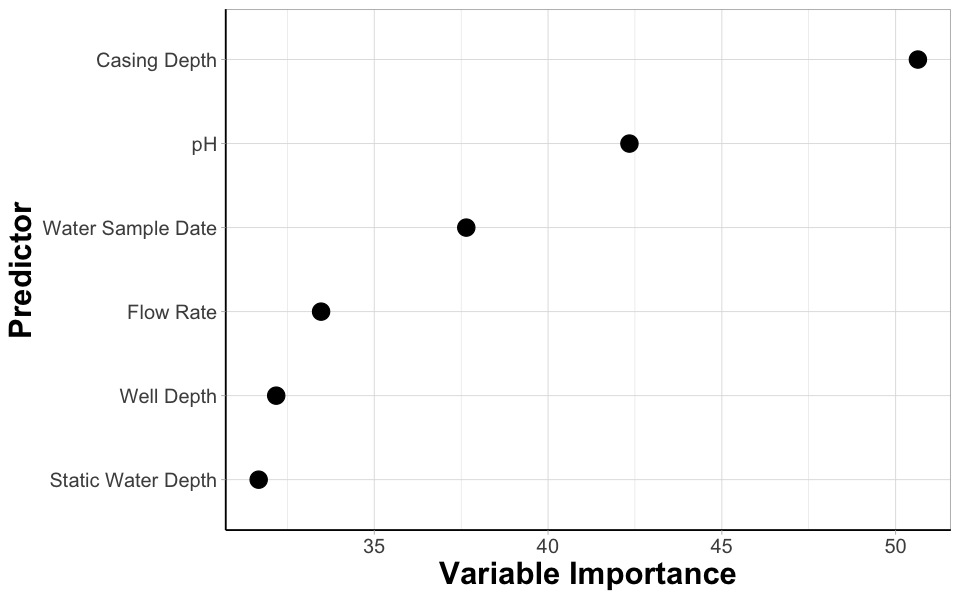

In [7]:
options(repr.plot.width=8, repr.plot.height=5) #changing plot size

ggplot(data = modified_variable_importance_df , 
             aes(x = MeanDecreaseGini, y = Predictor, size = 3)) + 
  geom_point() + 

  theme_light() + 
  theme(axis.line = element_line(color = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance', y = 'Predictor') + #changing axis labels 
  
  guides(size = "none")#removing size legend

*With this, we can answer **Environmental Health Question #1***: After plotting variable importance from highest to lowest, which two predictors have the highest variable importance on the predictive accuracy of iAs detection from a RF algorithm?
   
**Answer**: From the variable importance dataframe and plot, we can see that casing depth and pH had the greatest impact on RF followed by water sample date, flow rate, well depth, and static water depth in descending order. 

Since casing depth and pH have been identified as the predictors with the highest variable importance, they will be used as the two predictors for the decision boundary plot.

<br>

### Decision Boundary Calculation
First, RF will be trained with casing depth and pH. Since, the decision boundary plot will be used for visualization purposes and a 2-D figure can only plot two variables, we will not worry about tuning the parameters as was previously done. 

In [8]:
# Creating a dataframe with variables based on the highest predictors
highest_predictivity_data = data.frame(arsenic_data[,c("Casing_Depth", "pH", "Detect_Concentration")])

# Training RF
rf_detect_arsenic = randomForest(Detect_Concentration~., data = highest_predictivity_data)

From this RF prediction, the decision boundary will be calculated. This will be done by predicting `Detect_Concentraion` between a grid of values - specifically the minimum and maximum of the two predictiors (casing depth and pH). A non-linear line will be drawn on the plot to separate the two classes. 

In [9]:
get_grid_df <- function(classification_model, data, resolution = 100) {
    # This function predicts the outcome (Detect_Concentration) at evenly spaced data points using the two variables (pH and casing depth)
    # to create a decision boundary between the outcome classes (detect and non-detect samples).

    # :parameters: a classification-based supervised machine learning model, dataset containing the predictors and outcome variable,
    # specifies the number of data points to make between the minimum and maximum predictor values
    # :output: a grid of values for both predictors and their corresponding predicted outcome class

    # Grabbing only the predictor data
    predictor_data <- data[,1:2]
    
    # Creating a dataframe that contains the min and max for both features
    min_max_df <- sapply(predictor_data, range, na.rm = TRUE)

    # Creating a vector of evenly spaced points between the min and max for the first variable (casing depth)
    variable1_vector <- seq(min_max_df[1,1], min_max_df[2,1], length.out = resolution)
    # Creating a vector of evenly spaced points between the min and max for the second variable (pH)
    variable2_vector <- seq(min_max_df[1,2], min_max_df[2,2], length.out = resolution)

    # Creating a dataframe of grid values by combining the two vectors
    grid_df <- data.frame(cbind(rep(variable1_vector, each = resolution), rep(variable2_vector, time = resolution)))
    colnames(grid_df) <- colnames(min_max_df)
    
    # Predicting class label based on all the predictor pairs of data
    grid_df$Pred_Class = predict(classification_model, grid_df, type = "class")
    
    return(grid_df)
}

# calling function
grid_df_rf = get_grid_df(rf_detect_arsenic, highest_predictivity_data)
head(grid_df_rf)

,Casing_Depth,pH,Pred_Class
,<dbl>,<dbl>,<fct>
1,27,5.400000,ND
2,27,5.433333,ND
3,27,5.466667,ND
4,27,5.500000,ND
5,27,5.533333,ND
6,27,5.566667,ND


## Decision Boundary Plot

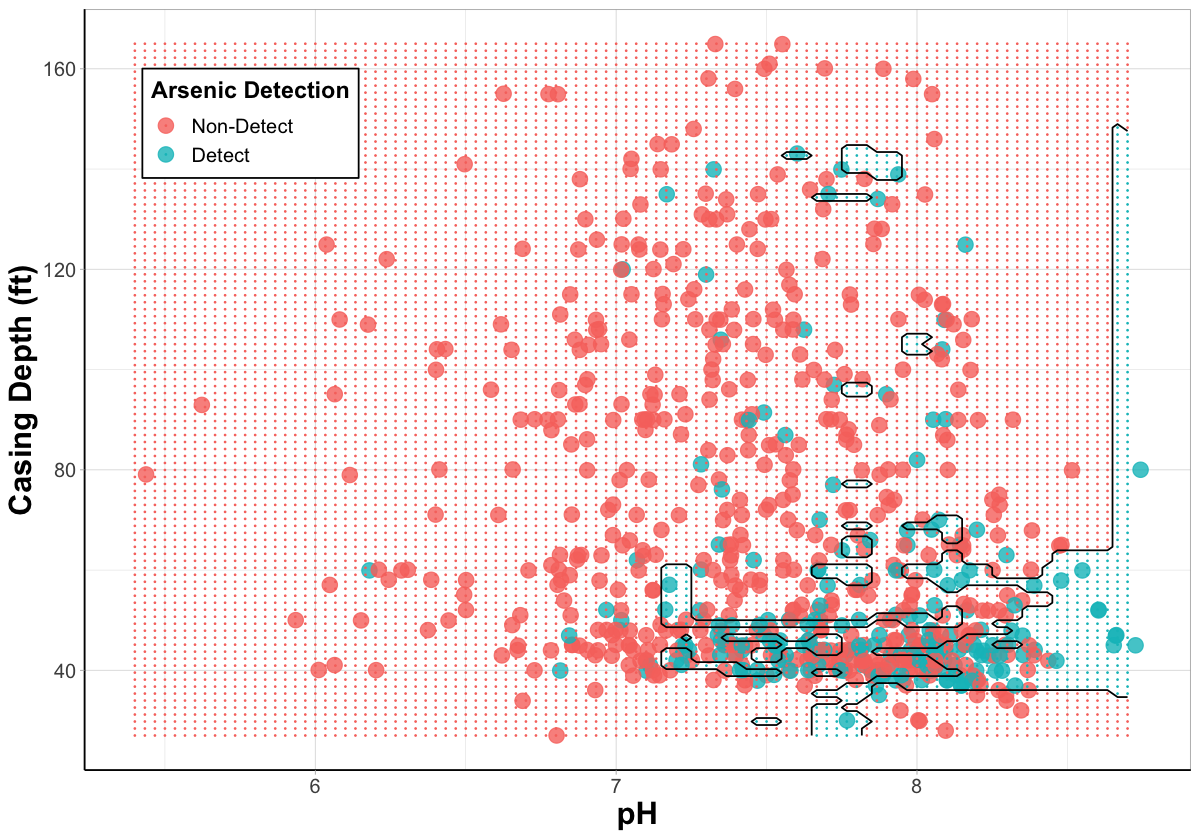

In [10]:
options(repr.plot.width=10, repr.plot.height=7) #changing plot size

ggplot() +
  geom_point(data = arsenic_data, aes(x = pH, y = Casing_Depth, color = Detect_Concentration),
            position = position_jitter(w = 0.1, h = 0.1), size = 4, alpha = 0.8) + 
  geom_contour(data = grid_df_rf, aes(x = pH, y = Casing_Depth, z = as.numeric(Pred_Class == "D")), 
               color = "black", breaks = 0.5) + # adds contour line
  geom_point(data = grid_df_rf, aes(x = pH, y = Casing_Depth, color = Pred_Class), 
             size = 0.1) + # shades plot

  theme_light() + 
  theme(axis.line = element_line(color = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = c(0.15,0.85), # move legend to top left corner
        legend.background = element_rect(color = 'black', fill = 'white', linetype = 'solid'), # changes legend background
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(y = 'Casing Depth (ft)') + #changing axis labels 

  scale_color_discrete(name = "Arsenic Detection", # renaming the legend
                      labels = c('Non-Detect','Detect')) # renaming the classes

*With this, we can answer **Environmental Health Question #2***: Using the two features with the highest variable importance, how can a decision boundary be visualized to separate and predict iAs detection?

**Answer**: There is some overlap between detect and non-detect iAs samples; however, it is still evident that detect iAs samples were more likely to have a more basic pH and have a lower (<80 ft) casing depth.

## Concluding Remarks
In conclusion, this training module provided methodologies to aid in the interpretation of supervised ML with variable importance and decision boundary plots. Variable importance helps quantify the impact of each feature's importance on an algorithm's predictivity. The most important or environmentally-relevant predictors can be selected in a decision boundary plot to further understand and visualize the features impact on the model's classification. 

## Additional Resources

+ [Variable Importance](https://compgenomr.github.io/book/trees-and-forests-random-forests-in-action.html#variable-importance-1)
+ [Decision Boundary](https://www.aiforanyone.org/glossary/decision-boundary#:~:text=a%20decision%20boundary%3F-,A%20decision%20boundary%20is%20a%20line%20or%20surface%20that%20separates,make%20predictions%20about%20new%20data.)

<br>

## Test Your Knowledge
1. Using the "Managanese_Data", extract the variable importance for each predictor on a RF model. What two features have the highest variable importance?  
2. Using casing depth and the feature with the highest variable importance, construct a decision boundary plot. Was RF able to separate Manganese samples based on these two variables?